In [0]:
import warnings 

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
data=pd.read_csv("/content/drive/My Drive/applied ai/assignments/habermann/haberman.csv")

In [32]:
data.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


<h>**Observation:**<h>

1)There are 4 attributes in which 3 are the features and 1 class attribute.

2) year between 1958-1969.

3)If patient is survived more than 5 years after the surgery then it is represented as 1 and if the patient is not survived more than 5 years it is represented as 2.

4)There are 306 patients.

5)Among the 4 features one is target/class attribute then remainig 

there are 3 features age,year and nodes

<h>**Understanding**<h>

1)It is a 3 dimension dataset so we can analyse the datase with pairplots

2)there is no missing values in the dataset  

3)It is a binary classification model

In [34]:

data['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

Here we can observe that the data is imbalanced which means class of status is not similar

In [35]:
data.isnull()


,age,year,nodes,status
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
301,False,False,False,False
302,False,False,False,False
303,False,False,False,False
304,False,False,False,False


There are no null points

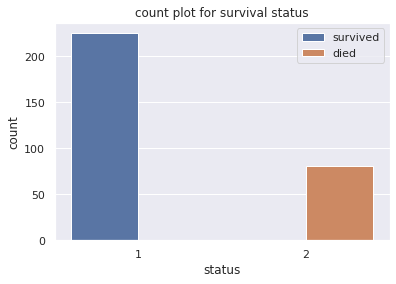

1    225
2     81
Name: status, dtype: int64

In [36]:
#plotting number of patients survival status

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
sns.countplot(x="status",hue='status',data=data)
plt.legend(['survived','died'])
plt.title('count plot for survival status')
plt.show()
data['status'].value_counts()

In [37]:
#Seperating survived and dead patients
Survived=data[data['status']==1]
Dead=data[data['status']==2]
print('*******survived data *********')
print(Survived.describe())

print('*******  non-survivals data  *******')
print(Dead.describe())

*******survived data *********
              age        year       nodes  status
count  225.000000  225.000000  225.000000   225.0
mean    52.017778   62.862222    2.791111     1.0
std     11.012154    3.222915    5.870318     0.0
min     30.000000   58.000000    0.000000     1.0
25%     43.000000   60.000000    0.000000     1.0
50%     52.000000   63.000000    0.000000     1.0
75%     60.000000   66.000000    3.000000     1.0
max     77.000000   69.000000   46.000000     1.0
*******  non-survivals data  *******
             age       year      nodes  status
count  81.000000  81.000000  81.000000    81.0
mean   53.679012  62.827160   7.456790     2.0
std    10.167137   3.342118   9.185654     0.0
min    34.000000  58.000000   0.000000     2.0
25%    46.000000  59.000000   1.000000     2.0
50%    53.000000  63.000000   4.000000     2.0
75%    61.000000  65.000000  11.000000     2.0
max    83.000000  69.000000  52.000000     2.0


<h>**Observation:**<h>

1)No.of patients who are survied :225 and dead : 81

2)The average age of patients who are survived : 52 and dead :53

3)On an average every survived patient contain 2 to 3 nodes and dead patients contain 7 to 8

4)Standard deviation of age is 11 (that is the spread of age from the mean is 11years)


<h>**Understanding**<h>

From the above information 50%  patients survived with zero nodes.
By observing mean of nodes of patients making scence that there are less number of nodes when compared to dead patients.

Percentiles are little confusing.But one thing is comformed that people with no nodes are survived.



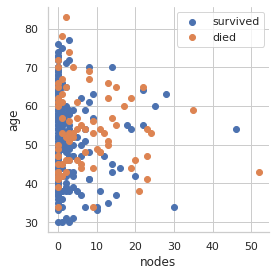

In [38]:
sns.set_style('whitegrid')
sns.FacetGrid(data, hue='status', height=4) \
 .map(plt.scatter, 'nodes', 'age')
plt.legend(['survived','died'])
plt.show();

In this plot  on x-axis no.of nodes and on y-axis patients agewise.
There is a confusion that it difficult to determine survival chances of patients age with no.of nodes 

so, plotting pair plots for better understanding

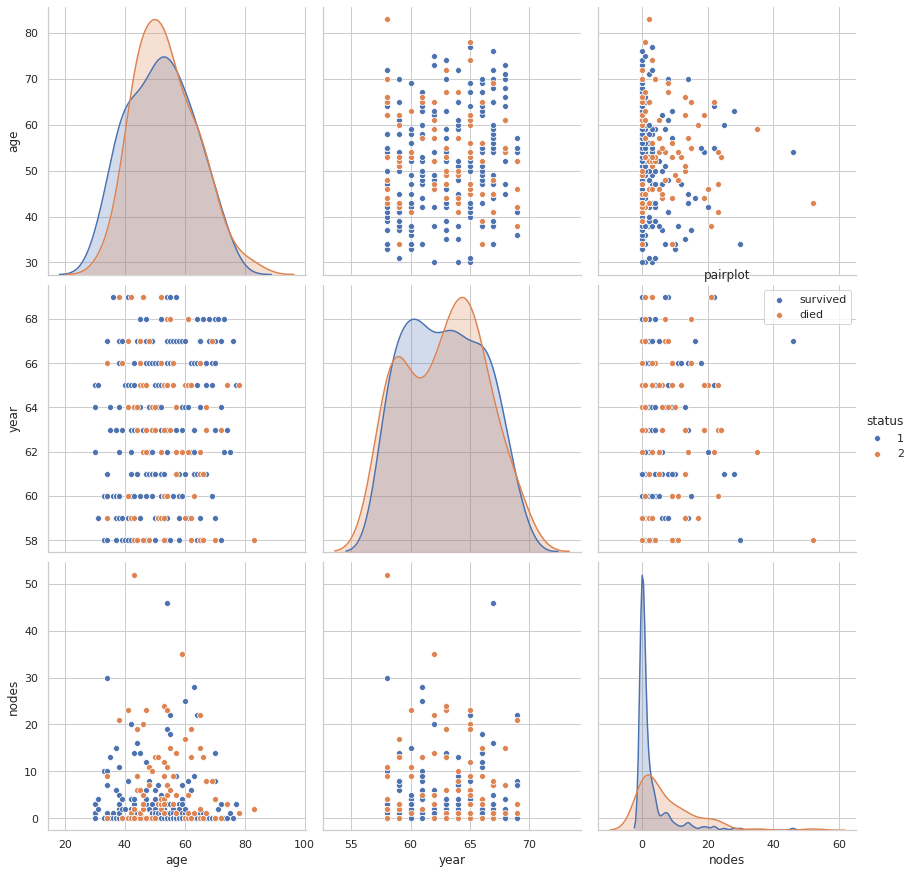

In [39]:

sns.set_style("whitegrid");
sns.pairplot(data, hue="status", height=4);
plt.title('pairplot')
plt.legend(['survived','died'])
plt.show()

plots 1,5 and 9 it shows the density of data with respective features.
Remaining all plots are overlapping so we cannot determine.


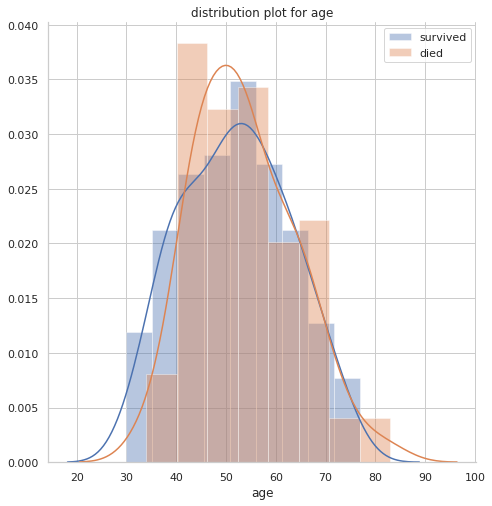

In [40]:
sns.FacetGrid(data, hue="status", height=7) \
   .map(sns.distplot, "age")
plt.title('distribution plot for age')
plt.legend(['survived','died'])
plt.show();

from above plot we can observe that the age from around 30 to 34 thereis no deaths
and from age around 76 to 85 there are no survivals
since this is not enough to predict 

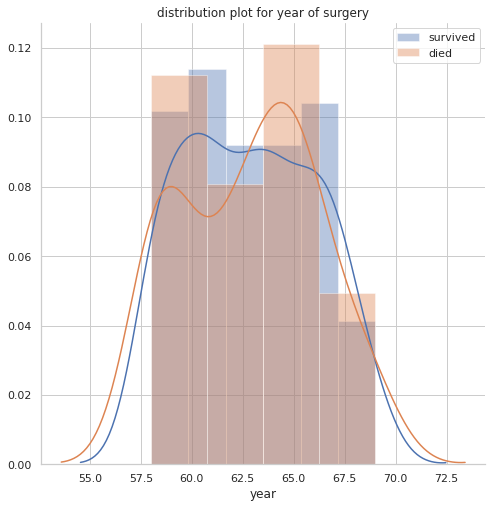

In [41]:

sns.FacetGrid(data, hue="status", height=7) \
   .map(sns.distplot, "year")
plt.legend(['survived','died'])
plt.title('distribution plot for year of surgery')
plt.show();

this plot showsnothing irrelevent so we can neglect this feature

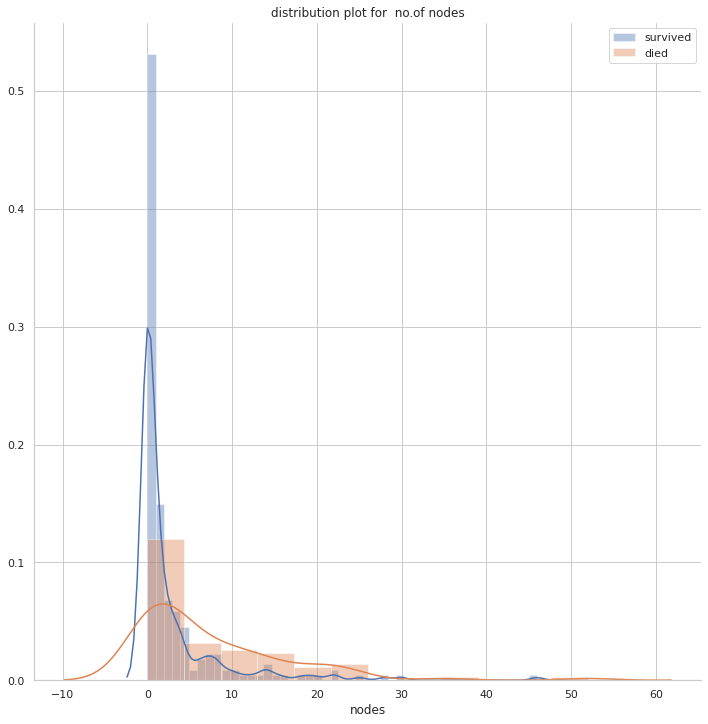

In [42]:
sns.FacetGrid(data, hue="status", size=10) \
   .map(sns.distplot, "nodes")
plt.legend(['survived','died'])
plt.title('distribution plot for  no.of nodes')
plt.show();

from this plot we can say that ,

1)if nodes <= 0 then there are no deaths

2)else if nodes between 0 to 4(approx) then there will be more no.of chances of survive

 since this is not enough to predict

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


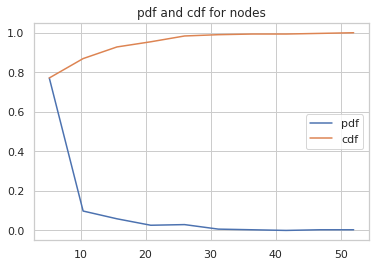

In [43]:
counts, bin_edges = np.histogram(data['nodes'], bins=10,
 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.title('pdf and cdf for nodes')
plt.legend(['pdf','cdf'])

This plot says every thing that

1)If nodes are incresing then the survival chances of survival are decreasing gradually

2)there are 60-80% of survival chances if noeds are <5(approx)

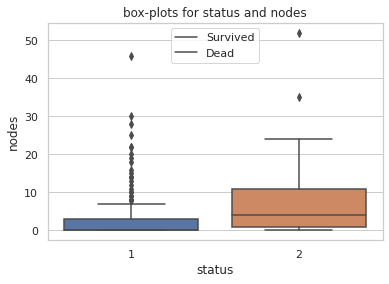

In [44]:
sns.boxplot(x='status',y='nodes', data=data)

plt.title('box-plots for status and nodes')
plt.legend(['Survived','Dead'])
plt.show()

From the above box plot after 5 nodes(approx) the deaths increasing drastically

 i.e,from the mean of dead plot 

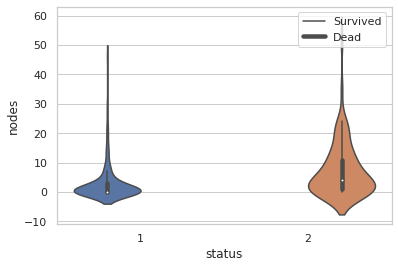

In [45]:
sns.violinplot(x='status', y='nodes',data=data,hue='status')
plt.legend(['Survived','Dead'])
plt.show()

From this plot it is clear that in the survival violin the density is high from 0-1 nodes 

When nodes are incresing no.of deaths also increasing 

<h>**Conclusion**<h>


from all features nodes gave significant result

Patients who had less than a single node are survived.

Patients from 1to3 nodes survival chances are high.